In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
from gurobipy import Model, GRB, quicksum

In [2]:
relationship_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Connection Matrix.csv', index_col=0)
constraint_mtx = pd.read_csv('../data/raw/Wedding Guest Network Data - Seating Constraints.csv', index_col=0)

In [4]:
constraint_mtx.fillna(0, inplace=True)

In [5]:
all(constraint_mtx.columns == relationship_mtx.columns) and all(constraint_mtx.index == relationship_mtx.index) and all(constraint_mtx.index == constraint_mtx.columns)

True

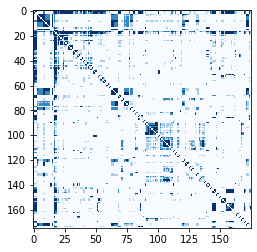

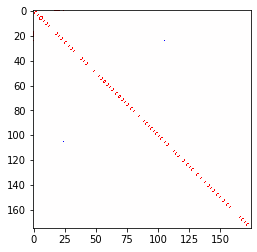

In [6]:
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.imshow(relationship_mtx.values, cmap='Blues', interpolation='nearest')
plt.show()

plt.imshow(constraint_mtx.values, cmap='bwr', interpolation='nearest')
plt.show()

In [8]:
guest_list = relationship_mtx.index.values.tolist()

In [9]:
len(guest_list)

175

In [10]:
for g in guest_list:
    for gp in guest_list:
        if gp == g:
            continue

        if relationship_mtx.loc[g, gp] != relationship_mtx.loc[gp, g]:
            print(g)
            print(gp)

        if constraint_mtx.loc[g, gp] != constraint_mtx.loc[gp, g]:
            print(g)
            print(gp)

In [11]:
tables = {
    f'Table {t+1}': 8 for t in range(len(guest_list)//8 + 1)
}

In [12]:
seating_model = Model()

Restricted license - for non-production use only - expires 2023-10-25


In [13]:
y = seating_model.addVars(guest_list, tables.keys(), vtype=GRB.BINARY, name="y")

In [14]:
not_seated_together_list = []
for i, g in enumerate(guest_list):
    for gp in guest_list[i+1:]:

        if constraint_mtx.loc[g, gp] == 1:
            relationship_mtx.loc[g, gp] *= 100
        elif constraint_mtx.loc[g, gp] == -1:
            not_seated_together_list.append((g, gp))

In [15]:
not_seated_together_list

[('Maggie Dunn', 'James Rogers')]

In [16]:
seating_model.setObjective(
    quicksum(
        quicksum(
            quicksum(
                relationship_mtx.loc[g, gp] * y[(g, table)] * y[(gp, table)] \
                    for table in tables.keys()) \
                for gp in guest_list[i+1:]) \
            for i, g in tqdm(enumerate(guest_list), total=len(guest_list))
    )
)

100%|██████████| 175/175 [00:16<00:00, 10.87it/s]


In [17]:
seating_model.addConstrs(quicksum(y[(g, table)] for g in guest_list) <= max_seats for table, max_seats in tables.items())

{('Table 1', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 2', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 3', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 4', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 5', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 6', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 7', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 8', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 9', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 10', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 11', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 12', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 13', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 14', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 15', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 16', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 17', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('Tab

In [18]:
seating_model.addConstrs(y[g, table] + y[gp, table] <= 1 for table in tables.keys() for g, gp in not_seated_together_list)

{('Table 1',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 2',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 3',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 4',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 5',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 6',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 7',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 8',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 9',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 10',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table 11',
  'Maggie Dunn',
  'James Rogers'): <gurobi.Constr *Awaiting Model Update*>,
 ('Table

In [19]:
seating_model.addConstrs(quicksum(y[g, table] for table in tables.keys()) == 1 for g in guest_list)

{'Richard Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Kathryn Russell': <gurobi.Constr *Awaiting Model Update*>,
 'Tim Balzer': <gurobi.Constr *Awaiting Model Update*>,
 'Mac Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Ali Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Ella Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Mary Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'William Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Wally Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Holly Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Daryl Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Molly Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Olivia Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Harper Bammerlin': <gurobi.Constr *Awaiting Model Update*>,
 'Austin Giangeruso': <gurobi.Constr *Awaiting Model Update*>,
 'Mary Grace Pattison': <gurobi.Constr *Awaiting Model Update*>,
 'Troy Nguyen': <gurobi.Constr 

In [20]:
seating_model.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads


GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license